# **Entrenamiento de Modelo (Machine Learning)**

## **Introducción**

Una compañía móvil requiere un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes más acorde con el usuario.

- **Plan de trabajo:**
    - Visualizar datos.
    - Segmentar los datos.
    - Ver el tipo de modelo necesario y colocarlos a prueba.
    - Comprobar calidad de los modelos.
    - Seleccionar el modelo con mayor exactitud.
    - Conclusiones

## **Visualizar datos**

In [31]:
#Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Cargar los datos
try:
    df = pd.read_csv('data/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [33]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [34]:
#Veriricar ausentes
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [35]:
#Revisar si existen duplicados 
df.duplicated().sum()

0

- **Descripción de datos**

    - `сalls` — número de llamadas,
    - `minutes` — duración total de la llamada en minutos,
    - `messages` — número de mensajes de texto,
    - `mb_used` — Tráfico de Internet utilizado en MB,
    - `is_ultra` — plan para el mes actual (Ultra - 1, Smart - 0).

Con los datos para el análisis, se puede determinar que el modelo requerido es supervisado y de clasificación.

## **Modelos**

### **Segmentar datos**

In [36]:
#Separar datos en objetivos y características
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [37]:
#Clasificar datos para entrenamiento 60%, testeo 20% y validación 20% 
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=12345, test_size= 0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=12345, test_size= 0.25)

In [38]:
print(f'datos de entrenamiento {x_train.shape} y cantidad de objetivos { y_train.shape[0]}. Porcentaje {round((y_train.shape[0]/len(df))*100,2)}%')
print(f'datos de entrenamiento {x_test.shape} y cantidad de objetivos { y_test.shape[0]}. Porcentaje {round((y_test.shape[0]/len(df))*100,2)}%')
print(f'datos de entrenamiento {x_val.shape} y cantidad de objetivos { y_val.shape[0]}. Porcentaje {round((y_val.shape[0]/len(df))*100,2)}%')

datos de entrenamiento (1928, 4) y cantidad de objetivos 1928. Porcentaje 59.99%
datos de entrenamiento (643, 4) y cantidad de objetivos 643. Porcentaje 20.01%
datos de entrenamiento (643, 4) y cantidad de objetivos 643. Porcentaje 20.01%


### **Árbol de decisión**

In [39]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
best_score = 0
best_depth = 0

for depth in range(1, 15):
    model= DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(x_train, y_train)
    score_test= model.score(x_test, y_test)
    if score_test > best_score:
        best_score = score_test
        best_depth = depth

In [40]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("max_depht {}".format(best_depth))

Accuracy del mejor modelo en el conjunto de testeo 0.7884914463452566
max_depht 5


In [41]:
#Crear modelo, árbol de decisiones con los mejores hiperparametros
final_model1 = DecisionTreeClassifier(random_state=12345, max_depth= best_depth)

In [42]:
#Entrenar modelo
final_model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=12345)

In [43]:
#Realizar predicciones con los datos de validación
predictions_val1 = final_model1.predict(x_val)

In [44]:
#Probar exactitud del modelo con los datos de validación
accuracy1 = accuracy_score(y_val, predictions_val1)

### **Bosque aleatorio**

In [45]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
best_score = 0
best_est = 0
best_depth = 0

for est in range(1, 100, 10):
    for depth in range(1, 10):
        model= RandomForestClassifier(random_state=12345, n_estimators= est, max_depth= depth)
        model.fit(x_train, y_train)
        score_test= model.score(x_test, y_test)
        if score_test > best_score:
            best_score = score_test
            best_est = est
            best_depth = depth

In [46]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("n_estimators {}".format(best_est))
print("max_depht {}".format(best_depth))

Accuracy del mejor modelo en el conjunto de testeo 0.8009331259720062
n_estimators 81
max_depht 9


In [47]:
#Crear modelo, bosque aleatorio con los mejores hiperparametros
final_model2 =RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)

In [48]:
#Entrenar modelo
final_model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=81, random_state=12345)

In [49]:
#Realizar predicciones con los datos de validación
predictions_val2 = final_model2.predict(x_val)

In [50]:
#Probar exactitud del modelo con los datos de validación
accuracy2= accuracy_score(y_val,predictions_val2)
accuracy2

0.7884914463452566

### **Regresión Logística**

In [51]:
#Probar con datos de entrenamiento y testeo
model= LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)
score_test= model.score(x_test, y_test)
score_test

0.7527216174183515

In [52]:
#Crear modelo, regresión logística con los mejores hiperparametros
final_model3= LogisticRegression(random_state=12345, solver='liblinear')

In [53]:
#Entrenar modelo
final_model3.fit(x_train, y_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [54]:
#Realizar predicciones con los datos de validación
predictions_val3 = final_model3.predict(x_val)

In [55]:
#Probar exactitud del modelo con los datos de validación
accuracy3 = accuracy_score(y_val, predictions_val3)
accuracy3

0.7293934681181959

### **clasificador de referencia**

In [59]:
#Probar con datos de entrenamiento y testeo, cuales son los hiperparametros que determinan el mejor modelo
strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
best_score = 0

for strategy in strategies:
    model = DummyClassifier(random_state = 12345, strategy = strategy)
    model.fit(x_train, y_train)
    score_test = model.score(x_test, y_test)
    if score_test > best_score:
        best_score = score_test
        best_strategy = strategy

In [61]:
print("Accuracy del mejor modelo en el conjunto de testeo {}".format(best_score))
print("Strategy: {}".format(best_strategy))

Accuracy del mejor modelo en el conjunto de testeo 0.6951788491446346
Strategy: most_frequent


In [63]:
#Crear modelo, regresión logística con los mejores hiperparametros
final_model4 = DummyClassifier(random_state = 12345, strategy = best_strategy)

In [66]:
#Entrenar modelo
final_model4.fit(x_train,y_train)

DummyClassifier(random_state=12345, strategy='most_frequent')

In [69]:
#Realizar predicciones con los datos de validación
predictions_val4 = final_model4.predict(x_val)
predictions_val4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
#Probar exactitud del modelo con los datos de validación
accuracy4 = accuracy_score(y_val, predictions_val4)
accuracy4

0.6889580093312597

## **Mejor modelo**

In [75]:
#Crear df con los datos obtenidos de accuracy y sanity_check
models = pd.DataFrame(
    {'model_type' : ['DecisionTree', 'RandomForest', 'LogisticRegresion', 'DummyClassifier'],
     'accuracy' : [accuracy1, accuracy2, accuracy3, accuracy4],
     }
)

In [76]:
#Visualizar el df
models

,model_type,accuracy
0,DecisionTree,0.758942
1,RandomForest,0.788491
2,LogisticRegresion,0.729393
3,DummyClassifier,0.688958


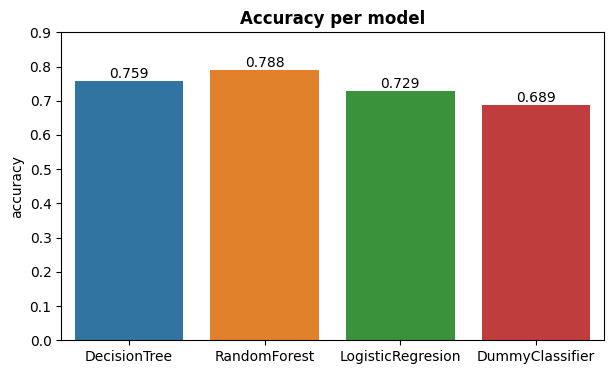

In [77]:
#Graficar la exactitud de los modelos
fig = plt.figure(figsize=(7, 4))
ax = sns.barplot(x='model_type',
            y='accuracy', 
            data=models,
            ax=fig.add_subplot(),
            )
plt.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Accuracy per model', fontweight = 'bold')
plt.ylim(0, 0.9)
plt.xlabel('')
plt.show()

## **Conclusiones**

1. **Visualizar datos:** Los datos no tienes ausentes, duplicados y la variable objetivo ya esta en valores numéricos.

2. **Segmentar los datos:** Los datos se lograron segmentar de la siguiente manera:
    - Entrenamiento con 1928 datos, siendo un 60%.
    - Testeo con 643 datos, siendo un 20%.
    - Validación con 643 datos, siendo un 20%.

3. **Ver el tipo de modelo necesario y probarlos:** El tipo de modelo necesario es de clasificación y se prueban tres modelos:
    - Árbol de decisión
    - Bosque aleatorio
    - Regresión logística
    - Clasificador de referencia

4. **Comprobar calidad de los modelos:** Se aplicaron métricas como exactitud y al mismo tiempo se probaron con hiperparametros diferentes, para así lograr los modelos con mejor precisión.

5. **Seleccionar el modelo con mayor exactitud:** Al ya tener los resultados de los tres modelos, el modelo que obtuvo mejor desempeño fue el de **bosque aleatorio** con una exactitud de **0.788**. Es decir, este es el modelo que realizara la mejores predicciones.
    - Tabla de los resultados:

| Modelos | Exactitud | Cordura |
|---|---|---|
| Árbol de decisiones | 0.758 | n/a |
| **Bosque aleatorio** | **0.788** | n/a |
| Regresión logística | 0.729 | n/a |
| Clasificador de referencia | 0.688 | 0.557 |

6. **Conclusión final:**

De acuerdo con los resultados obtenidos, el bosque aleatorio es el mejor modelo para analizar el comportamiento de los clientes y recomendar uno de los nuevos planes telefónicos. Este modelo tiene una precisión del 78,8%, lo que significa que tiene una alta probabilidad de predecir correctamente el plan telefónico para un cliente. Además, tiene una cordura del 45,9%, lo que significa que sus recomendaciones son comprensibles y fáciles de seguir.